## A mixability theory for the role of sex in evolution


#### Fisher-Wright Model:

The landscape of a 2-gene organism


<table>
    <tr>
        <td>  </td>
        <td> B1 </td>
        <td> B2 </td>
        <td> B3 </td>
        <td> B4 </td>
        <td> B5 </td>
    </tr>
    <tr>
        <td> A1 </td>
        <td> 3 </td>
        <td> 2 </td>
        <td> 4 </td>
        <td> 5 </td>
        <td> 4 </td>
    </tr>
    <tr>
        <td> A2 </td>
        <td> 1 </td>
        <td> 0 </td>
        <td> 0 </td>
        <td> 7 </td>
        <td> 2 </td>
    </tr>
    <tr>
        <td> A3 </td>
        <td> 2 </td>
        <td> 1 </td>
        <td> 0 </td>
        <td> 4 </td>
        <td> 3 </td>
    </tr>
    <tr>
        <td> A4 </td>
        <td> 1 </td>
        <td> 8 </td>
        <td> 1 </td>
        <td> 3 </td>
        <td> 2 </td>
    </tr>
</table>


#### Notation

- $W[i, j] =: w_{i, j}$ is the fitness of combination allele $A_i$ with $B_j$.
- $P_{i, j}[t]$ frequency of genotype $A_iB_j$ at generation $t$. I will call $ (i, j) \mapsto P_t(i, j) := P_{i, j}[t]$.
- $r$ recombination rate (between $0$ and $1/2$).


$$ \Large
\tilde{P}_{i, j}[t] := \frac{P_{i, j}[t] w_{i, j}}{\overline{w}[t]}
$$

- $\overline{w}[t] := \sum_{i,j} w_{i, j} P_{i, j}[t]$ 

The model updates the frequencies in the following way: 


$$ \Large
\begin{align*}
P_{i, j}[t + 1] &= (1 - r)\tilde{P}_{i, j}[t] + 
    r \left( \sum_{l} \tilde{P}_{i, l}[t] \right) \left( \sum_{k} \tilde{P}_{k, j}[t]\right) \\
                &= (1 - r)\tilde{P}_{i, j}[t] + r \left( \mathbb{E}_{~P}[w_i] \mathbb{E}_{~P}[w_j] \right)
\end{align*}
$$


### Interpretation: 

- $\tilde{P}_{i, j}[t]$ is the freq. of $A_iB_j$ weighted by the fitness. 
    - A combination with high fitness increases $\tilde{P}$.
    
    
    
- When $r=0$, the model describes an asexual reproduction where $P_{i,j}$ increases proportionally to its fitness $w_{i, j}$. 
    - It will select the combinations with the highest fitness.
    

- When $r>0$, the model describes a sexual reproduction. The frequencie $P_{i,j}$ change proportionally to:
    - Its fitness $w_{i, j}$ and  
    - $\mathbb{E}_{~P}[w_i] \mathbb{E}_{~P}[w_j]$.
    - The model will select combinations with high fitness and alleles with high average fitness. 
    
### Limitations: 

1. Fitness remains constant.
2. Mutations are not tanken into account. 
        

---------------
### Does the model maximize something?


Let $ M_i := \frac{\sum_{g \in G} w_g i_g}{\sum_{g \in G} i_g}$ be the average fitness of genotype $g$. We call it MIXABILITY.


In the example above:  

$ M_{A_1} = \dfrac{ w_{1, 1} + w_{1, 2} + w_{1, 3} + w_{1, 4} + w_{1, 5}}{5}$

$ M_{B_2} = \dfrac{ w_{1, 2} + w_{2, 2} + w_{3, 2} + w_{4, 2}}{4}$

Consider the following populationwide measure of mixability:

$\overline{M}[t] = \dfrac{\sum_{l \in L} \sum_{k \in l} P_k[t] M_k}{|L|}$

In the example: 

$\overline{M}[t] =  \dfrac{\sum_i P_{i, \cdot}[t] \ M_{A_i} + \sum_j P_{\cdot, j}[t] \ M_{B_j}}{2}$

---------------
### Simulations

Choose $n$ fitness matrices and $n$ frequency matrices: 

- $W^1, ..., W^n$
- $P^1, ..., P^n$

For each pair $(W^j, P^j)$ and each recombination rate $r \in \{0.05, 0.2, 0.5\}$, itterate the corresponding equations $2^{15}$ generations and compare:

- $\% (\bar{M}^{sex} > \bar{M}^{asex})$
- $\% (\bar{w}^{sex} > \bar{w}^{asex})$

In [3]:
import numpy as np 
import scipy
import matplotlib.pylab as plt

In [12]:
# In this example I'll use 2 locus A and B each one with 3 alleles: A1, A2, A3 and B1, B2, B3. 

f = 0.2
w = np.random.uniform(low=1 - f, high=1 + f, size=9)
p = np.random.uniform(low=0, high=1, size=9)

W = w.reshape((3, 3))
P = p.reshape((3, 3))

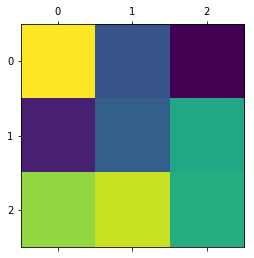

In [17]:
plt.matshow(W)
plt.show()